## Intro to Time Series

Forecasting is the process of making predictions based on past and present data. Good forecasts capture the genuine patterns and relationships which exist in the historical data, but do not replicate past events that will not occur again.

There is a difference between a **random fluctuation** and a **genuine pattern** that should be modelled and extrapolated.

#### Time series graphics
The first thing we shoud do in quantitative forecasting is understand the data. This can be done with exploration analysis.
We should look for:
1. Patterns
2. Unusual observations
2. Changes over time
4. Relationships between variables.

#### Time Series Patterns

1. Trend: Long term increase or decrease, does not have to be linear.
2. Seasonal: The series is affected by a seasonal pattern, like fridays on beer consumption.
3. Cyclical: Rises and falls on a that are not of a fixed frequency.

Patterns help us build good models.

In [136]:
# libraries needes for case studies
import pandas as pd # Pandas is the python library for working with and visualizing time series
import numpy as np # Numpy is a library for matricial operations and high-level mathematical functions
import matplotlib.pyplot as plt # Matplot lib is the basic python graphic library
import plotly.express as px # Ploty is a another graphic library
import seaborn as sns # Ploty a graphic library focused on pandas dataframe and based on matplotlib
import scipy.stats as stats # statistical module from scipy
import statsmodels.api as sm # statistical models library
import pyreadr # module for reading different data types, including r data

# Global parameters for plt graphics
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = [10,6]

### Time series regression models
Time series can be thought as a list of numbers indexed by time.

The basic idea of regression is that we try to **explain** a time series $y$ assuming a linear relationship with another time series $x$.

For example we might try to forecast the GDP $y$ using employment $X_1$ and interest rate $X_2$

#### Simple linear regression

In the simplest case, the regression model allows for a linear relationship between the forecast variable $y$ and a single predictor variable $x$:
$$y_t = \beta_0 + \beta_1x_t + \epsilon_t$$

True Intercept: 10	 True Linear Coef: 0.5
Est. Intercept: 9.83	 Est. Linear Coef: 0.50


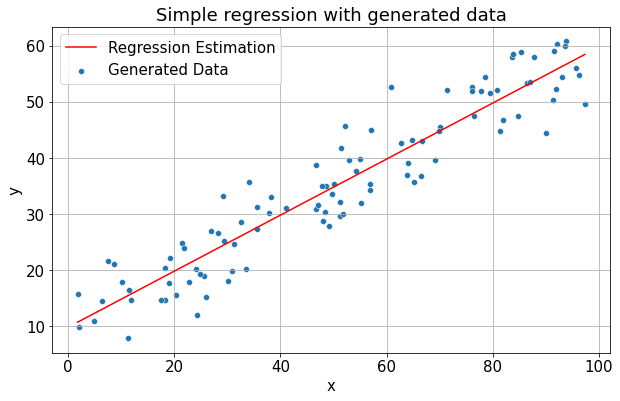

In [89]:
# artificial example for linear regression
x = stats.uniform.rvs(0,100,size = 100) # x is sample from a uniform distribuiton
error = stats.norm.rvs(0,5, size = 100) # error has a normal distribution in our case
b0 = 10
b1 = 0.5
# generating predictable variable
y = b0 + b1*x + error

## Crating Ordinary Least Squares (OLS) model
X = sm.add_constant(x)
model = sm.OLS(y,X)
result_model = model.fit()
# predicting results
y_pred = result_model.predict(X)

# Transforming it all on da Data Frame
generated_data = pd.DataFrame(np.array([x,y,y_pred]).T, columns = ['x','y','y_pred'])

# Ploting the regression
sns.scatterplot(data = generated_data, x = 'x', y = 'y', label = 'Generated Data')
sns.lineplot(data = generated_data, x = 'x', y = 'y_pred',color = 'r', label = 'Regression Estimation')
plt.title('Simple regression with generated data')
plt.grid();

# Comparing the true values ans their estimations
print(f'True Intercept: {b0}\t True Linear Coef: {b1}')
b0_est, b1_est = result_model.params
print(f'Est. Intercept: {b0_est:.2f}\t Est. Linear Coef: {b1_est:.2f}')


### Example: US consumption expenditure

The plot below shows time series of quarterly percentage changes (growth rates) of real personal consumption expenditure, $y$, and real personal disposable income, $x$, for the US from 1970 Q1 to 2016 Q3.

,Consumption,Income,Production,Savings,Unemployment
1970-03-31,0.615986,0.972261,-2.452700,4.810312,0.9
1970-06-30,0.460376,1.169085,-0.551525,7.287992,0.5
1970-09-30,0.876791,1.553271,-0.358708,7.289013,0.5
1970-12-31,-0.274245,-0.255272,-2.185455,0.985230,0.7
1971-03-31,1.897371,1.987154,1.909734,3.657771,-0.1
1971-06-30,0.911993,1.447334,0.901536,6.051342,-0.1


In [149]:
# Reading Data
rdata = pyreadr.read_r(r"data/uschange.rda")
uschange_data = rdata['uschange']

# generating time index and indexing data
quarters = pd.date_range('1970', periods=len(uschange_data), freq = 'Q')
uschange_data.index = quarters
print(uschange_data.head(6))
px.line(uschange_data,x = uschange_data.index, y =  ['Consumption', 'Income'], 
        title = 'US real personal consumption expenditure and real personal disposable income changes')


            Consumption    Income  Production   Savings  Unemployment
1970-03-31     0.615986  0.972261   -2.452700  4.810312           0.9
1970-06-30     0.460376  1.169085   -0.551525  7.287992           0.5
1970-09-30     0.876791  1.553271   -0.358708  7.289013           0.5
1970-12-31    -0.274245 -0.255272   -2.185455  0.985230           0.7
1971-03-31     1.897371  1.987154    1.909734  3.657771          -0.1
1971-06-30     0.911993  1.447334    0.901536  6.051342          -0.1


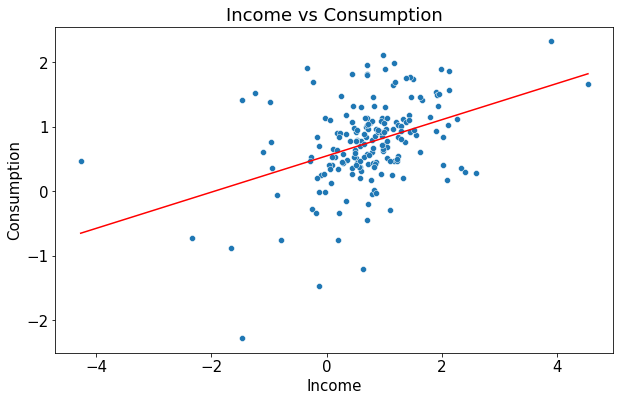

In [186]:
X = sm.add_constant(uschange_data.loc[:,['Income']].to_numpy())
model = sm.OLS(uschange_data['Consumption'].to_numpy(),X)
result_model = model.fit()
y_pred = result_model.predict(X)

sns.lineplot(data = uschange_data, x = 'Income', y = y_pred, color = 'r')
sns.scatterplot(data = ic, x = 'Income', y = 'Consumption')
plt.title('Income vs Consumption');

In [188]:
pd.Period(value='4Q2005', freq='Q')

Period('2005Q4', 'Q-DEC')